# Setting up environnement :

In [ ]:
!pip install pydub
!pip install librosa

In [ ]:
#Changing work dir
import os
Audio_dir='/content/drive/MyDrive/Colab Notebooks/Audio'
os.chdir(Audio_dir)

In [ ]:
import pydub 
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt


# Creating a numpy array from the mp3 files : 

In [ ]:

def read(f, normalized=False,return_sr=True):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_wav(f)
    y = np.float32(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if return_sr:
      if normalized:
          return a.frame_rate, np.float32(y) / 2**15
      else:
          return a.frame_rate, y
    else:
      if normalized:
          return  np.float32(y) / 2**15
      else:
          return  y

#We create an array of size music_length*sample_rate

# Splitting audio into chunks :

In [ ]:
def write(f, sr, x, normalized=False):
    """numpy array to WAV"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="wav", bitrate="320k")


In [ ]:
def split_audio(audio,split_size,name_input): ##audio : np array of sound, split size :number of samples per chunk, name : name of created chunks
  samples=int(audio.size/split_size)
  sample_array=np.empty(split_size)
  iteration=0
  print(split_size,audio.size)
  for i in range (0,audio.size-split_size,split_size):
    for j in range(split_size):
      sample_array[j]=audio[i+j]
    name=name_input+'_'+str(iteration)+'.wav'
    iteration=iteration+1
    write(name,44100,sample_array)
  print("Created",iteration,"file(s)")



# Automation of the splitting process

In [ ]:
def get_filename(dir_name):
  filenames_list=[]
  for entry in os.scandir(dir_name):
     if (entry.path.endswith(".wav") and entry.is_file()):
      filenames_list.append(entry.name)
  return filenames_list
         

In [ ]:
def split_audio_from_dir(dir_path,split_size): ##dir_path : path of directory to use split_size : size of the chunks in ms
  filenames_list=get_filename(dir_path)
  for filename in filenames_list:
    os.chdir(dir_path)
    sr,audio_array=read(filename)
    samples=int(split_size*0.001*sr)
    print(samples)
    os.mkdir(dir_path+'/'+str(filename[:-4]))
    os.chdir(dir_path+'/'+str(filename[:-4]))
    print("Entering split_audio")
    extensionless=filename[:-4]
    split_audio(audio_array,samples,extensionless)
    
    print("Treated ",filename)
  

In [ ]:
split_audio_from_dir(Audio_dir,200)


8820
Entering split_audio
8820 2558592
Created 290 file(s)
Treated  Disto_Drive60.wav
8820
Entering split_audio
8820 2558592
Created 290 file(s)
Treated  Disto_Drive80.wav
8820
Entering split_audio
8820 2558592
Created 290 file(s)
Treated  Disto_Drive100.wav
8820
Entering split_audio
8820 2558592
Created 290 file(s)
Treated  Disto_Drive40.wav
8820
Entering split_audio
8820 2558592
Created 290 file(s)
Treated  Disto_Drive20.wav
8820
Entering split_audio
8820 2558592
Created 290 file(s)
Treated  Clean.wav
8820
Entering split_audio
8820 2558592
Created 290 file(s)
Treated  Disto_TrebbleBoost_Drive60.wav
8820
Entering split_audio
8820 2558592
Created 290 file(s)
Treated  Disto_TrebbleBoost_Drive100.wav
8820
Entering split_audio
8820 2558592
Created 290 file(s)
Treated  Disto_TrebbleBoost_Drive80.wav
8820
Entering split_audio
8820 2558592
Created 290 file(s)
Treated  Disto_BassBoost_Drive40.wav
8820
Entering split_audio
8820 2558592
Created 290 file(s)
Treated  Disto_BassBoost_Drive20.wav
8

# Visualizing sound with librosa

[[-23.039253 -29.430138 -49.07984  ... -47.96524  -41.933067 -28.67006 ]
 [-22.822403 -28.692047 -56.157066 ... -54.437737 -53.82661  -29.413712]
 [-22.578026 -28.59143  -66.30762  ... -66.72671  -47.778442 -29.512993]
 ...
 [-78.94417  -69.60435  -63.428432 ... -70.08858  -72.45947  -76.86045 ]
 [-71.49811  -66.19801  -62.66016  ... -79.069824 -80.00001  -78.44914 ]
 [-66.21037  -80.00001  -64.92418  ... -79.29692  -80.00001  -76.57985 ]]


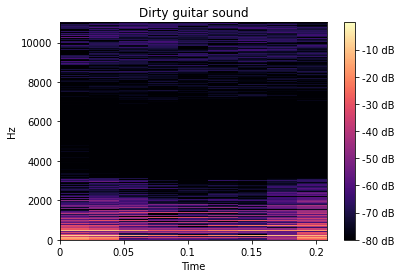

In [ ]:
Audio_dir1='/content/drive/MyDrive/Colab Notebooks/Audio/'+'Disto_TrebbleCut_Drive80'
os.chdir(Audio_dir1)
Disto=read('Disto_TrebbleCut_Drive80_280.wav',False,False)

D = librosa.stft(Disto,n_fft=4096)
Dirty_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig1, ax1 = plt.subplots()
img1 = librosa.display.specshow(Dirty_db, x_axis='time', y_axis='linear', ax=ax1)
ax1.set(title='Dirty guitar sound')
fig1.colorbar(img1, ax=ax1, format="%+2.f dB")
print(Dirty_db)
#librosa.display.waveplot(read('Disto_TrebbleCut_Drive80_280.wav',False,False))

In [ ]:
"""D = librosa.stft(dirty_sound)
Dirty_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
C = librosa.stft(clean_sound) 
Clean_db = librosa.amplitude_to_db(np.abs(C), ref=np.max)

#Plotting spectrograms

#Clean
fig, ax = plt.subplots()
img = librosa.display.specshow(Clean_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Clean guitar sound')
fig.colorbar(img, ax=ax, format="%+2.f dB")
##Dirty
fig1, ax1 = plt.subplots()
img1 = librosa.display.specshow(Dirty_db, x_axis='time', y_axis='linear', ax=ax1)
ax1.set(title='Dirty guitar sound')
fig.colorbar(img1, ax=ax1, format="%+2.f dB")"""


'D = librosa.stft(dirty_sound)\nDirty_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)\nC = librosa.stft(clean_sound) \nClean_db = librosa.amplitude_to_db(np.abs(C), ref=np.max)\n\n#Plotting spectrograms\n\n#Clean\nfig, ax = plt.subplots()\nimg = librosa.display.specshow(Clean_db, x_axis=\'time\', y_axis=\'linear\', ax=ax)\nax.set(title=\'Clean guitar sound\')\nfig.colorbar(img, ax=ax, format="%+2.f dB")\n##Dirty\nfig1, ax1 = plt.subplots()\nimg1 = librosa.display.specshow(Dirty_db, x_axis=\'time\', y_axis=\'linear\', ax=ax1)\nax1.set(title=\'Dirty guitar sound\')\nfig.colorbar(img1, ax=ax1, format="%+2.f dB")'

In [ ]:
"""os.chdir('/content/drive/MyDrive/Colab Notebooks/Audio_dirty')
split_audio(dirty_sound,50,'dirty')
os.chdir('/content/drive/MyDrive/Colab Notebooks/Audio_clean')
split_audio(clean_sound,50,'clean')"""

"os.chdir('/content/drive/MyDrive/Colab Notebooks/Audio_dirty')\nsplit_audio(dirty_sound,50,'dirty')\nos.chdir('/content/drive/MyDrive/Colab Notebooks/Audio_clean')\nsplit_audio(clean_sound,50,'clean')"